In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('waterQuality1.csv')
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


#Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [4]:
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [5]:
unique_values = data.iloc[:, 20].unique()

for value in unique_values:
    print(value)

#NUM! เป็นข้อมูลที่มีความผิดพลาดทางคณิตศาสตร์

1
0
#NUM!


In [6]:
#drop NUM!
data = data[~data.applymap(lambda x: x == '#NUM!').any(axis=1)]
data.reset_index(drop=True, inplace=True)

In [7]:
data.shape

(7996, 21)

In [8]:
data = data.astype(float)

In [9]:
data['is_safe'] = data['is_safe'].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [11]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [12]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [13]:
X = data.drop(['is_safe'], axis = 1)
y = data['is_safe']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.77740287 -0.58549134 -0.48087476 ...  1.05369443  1.33873624
  -0.91704015]
 [ 1.30694501  0.77511802 -0.59963176 ...  1.05369443  0.85113427
   0.19802266]
 [ 0.27157158 -0.02908321 -0.48087476 ...  0.70612871  2.03531047
  -1.28872776]
 ...
 [-0.45556091 -0.83666343 -0.63921743 ... -1.72683135 -0.75098648
   0.19802266]
 [-0.51878982 -0.48186877 -0.59963176 ... -1.72683135 -1.02961617
  -1.66041536]
 [-0.49507898 -0.83666343 -0.59963176 ... -1.72683135 -0.75098648
   0.19802266]]


#Exploratory

[Text(0, 0, '7084'), Text(0, 0, '912')]

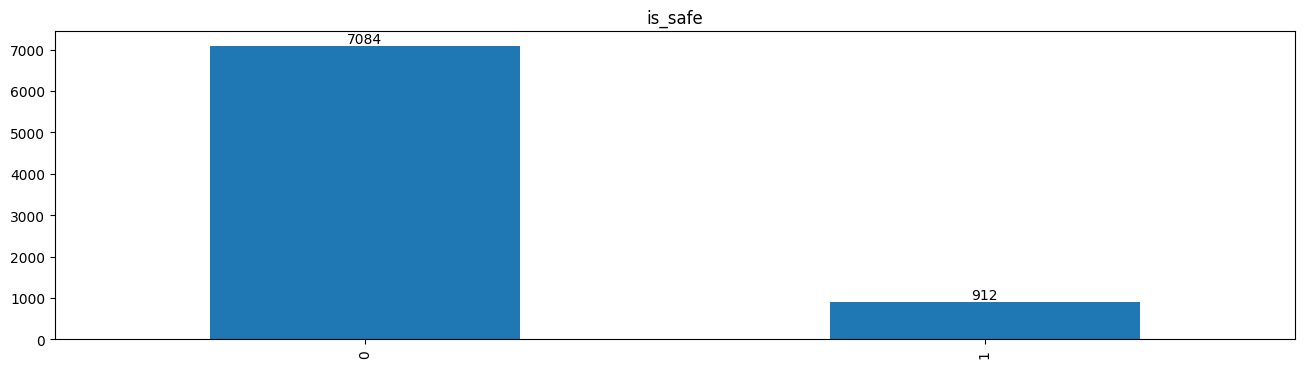

In [15]:
plt.figure()
is_safe = data['is_safe'].value_counts().plot.bar(figsize=(16,4), title='is_safe')
plt.bar_label(is_safe.containers[0])

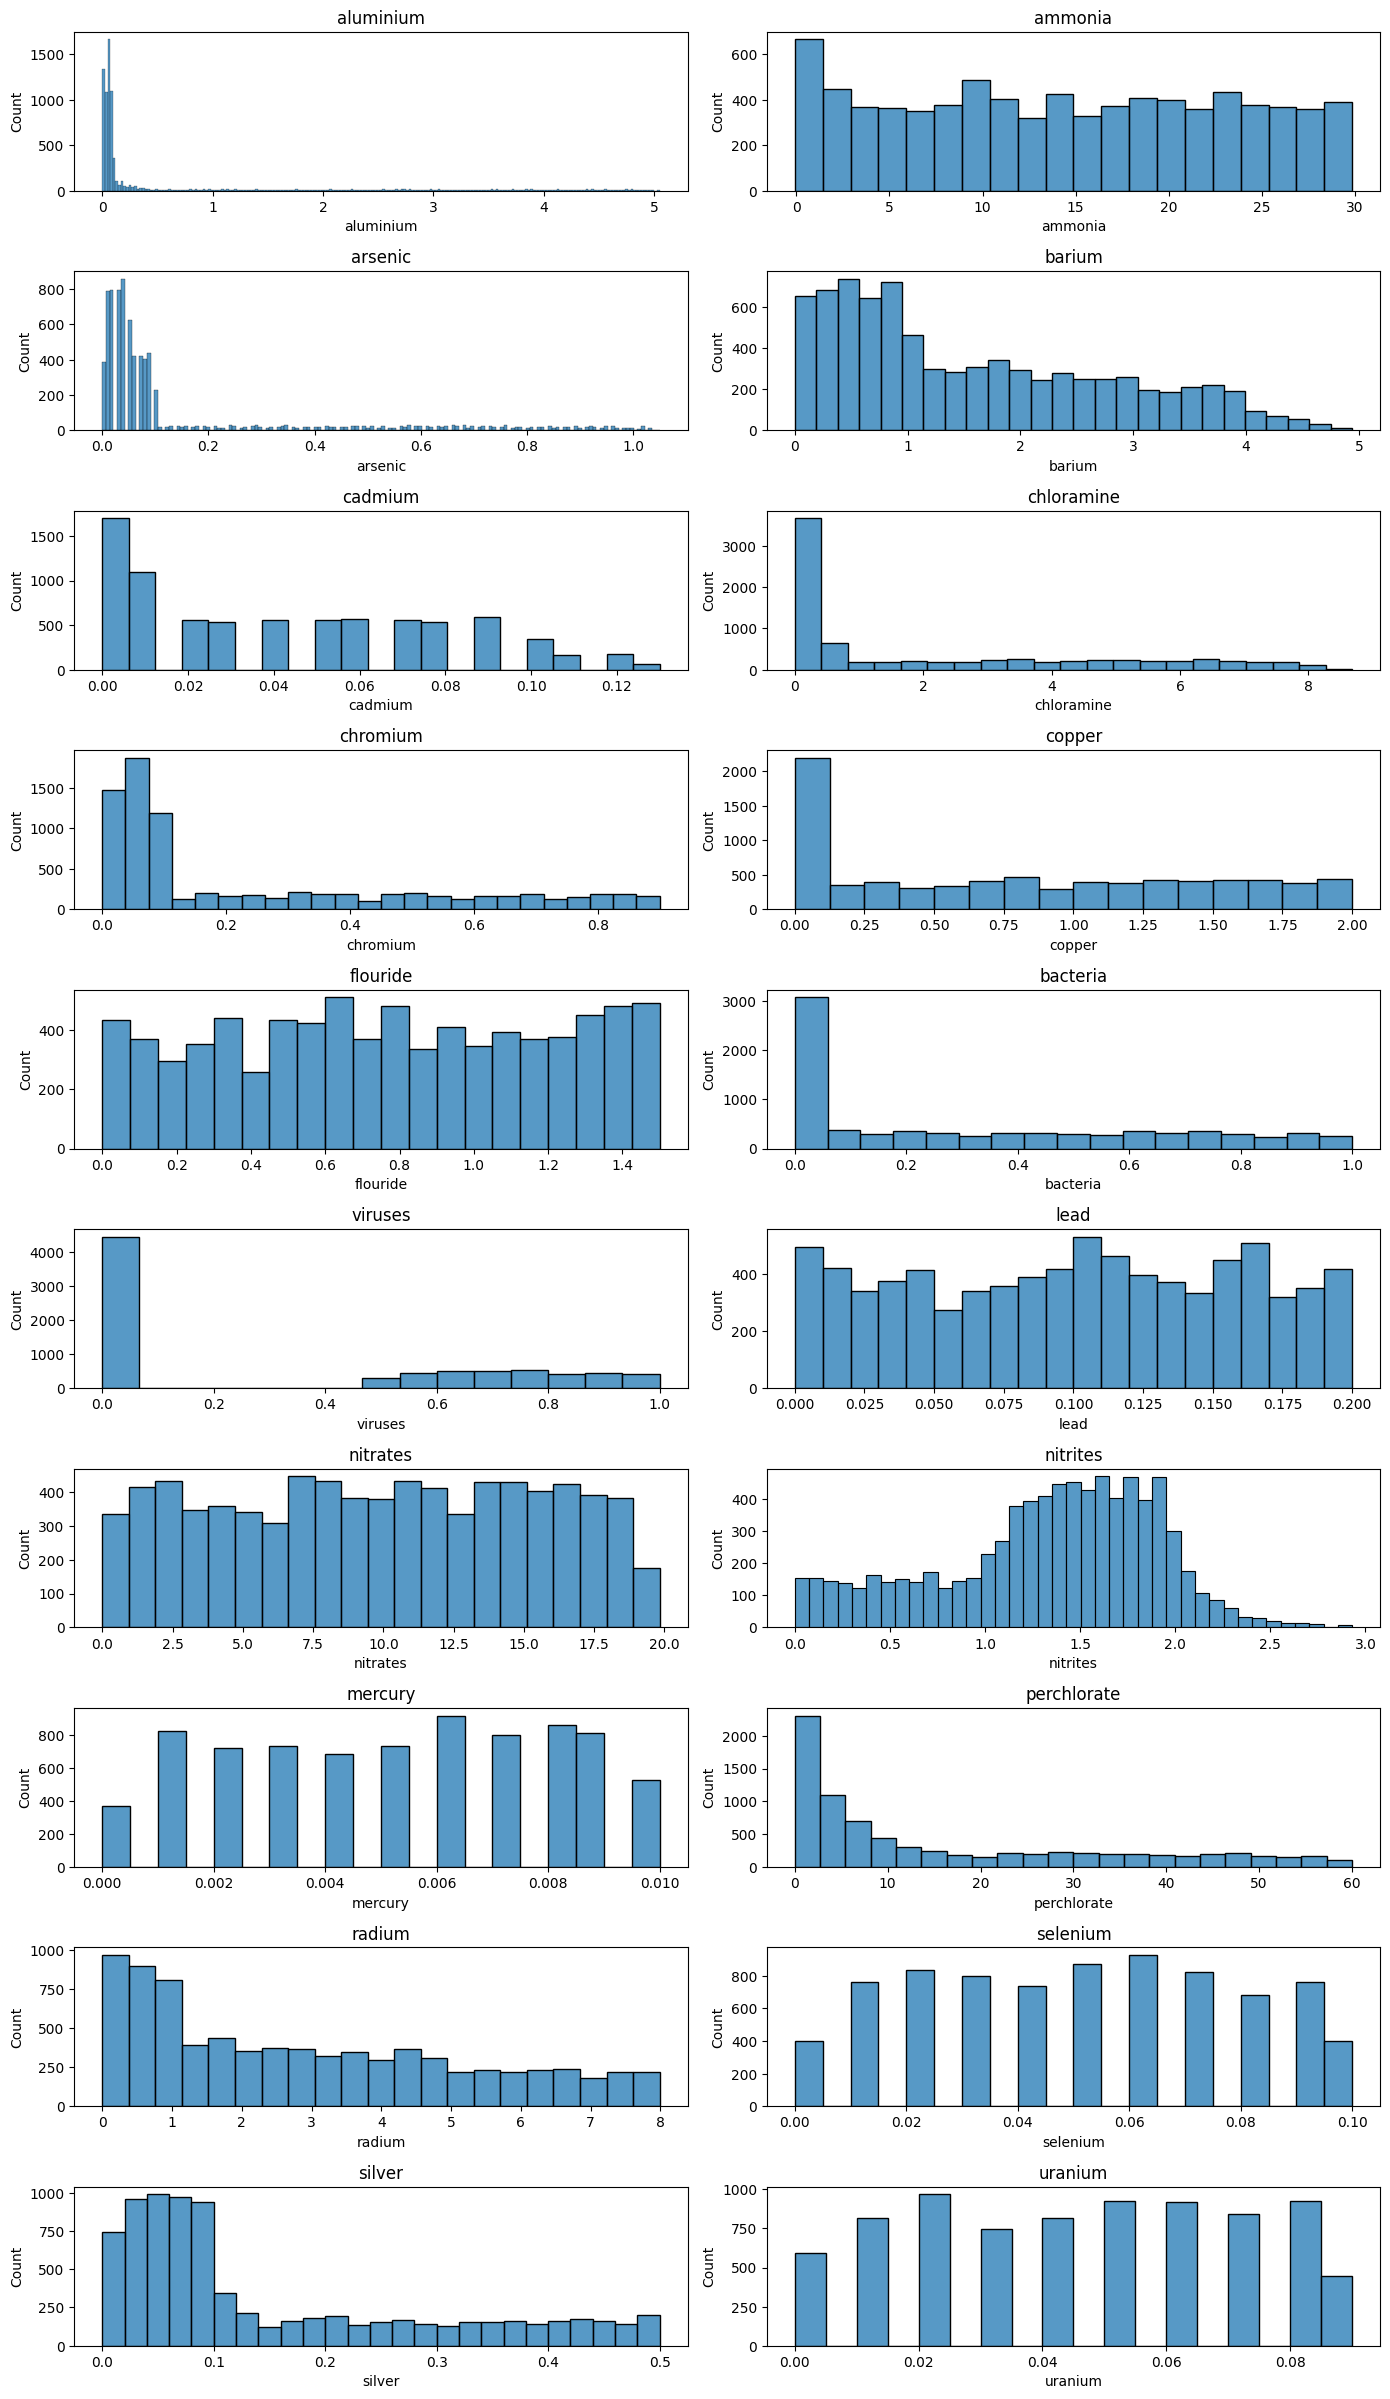

In [16]:
plt.figure(figsize=(14, 50))
columns_to_plot = data.columns[data.columns != 'is_safe']

for i, col in enumerate(columns_to_plot):
    plt.subplot(21, 2, i + 1)
    sns.histplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Modeling

In [17]:
X = data.drop(['is_safe'], axis = 1)
y = data['is_safe']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.77740287 -0.58549134 -0.48087476 ...  1.05369443  1.33873624
  -0.91704015]
 [ 1.30694501  0.77511802 -0.59963176 ...  1.05369443  0.85113427
   0.19802266]
 [ 0.27157158 -0.02908321 -0.48087476 ...  0.70612871  2.03531047
  -1.28872776]
 ...
 [-0.45556091 -0.83666343 -0.63921743 ... -1.72683135 -0.75098648
   0.19802266]
 [-0.51878982 -0.48186877 -0.59963176 ... -1.72683135 -1.02961617
  -1.66041536]
 [-0.49507898 -0.83666343 -0.59963176 ... -1.72683135 -0.75098648
   0.19802266]]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
# Decision tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth= None)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
print("Train data accuracy of tree_model :", tree_model.score(X_train, y_train))
print("Test data accuracy of tree_model :", tree_model.score(X_test, y_test))

Train data accuracy of tree_model : 1.0
Test data accuracy of tree_model : 0.9491454772822009


In [22]:
from sklearn.metrics import accuracy_score
y_pred_tree = tree_model.predict(X_test)
print('Accuracy predict data of tree_model :', accuracy_score(y_test, y_pred_tree))

Accuracy predict data of tree_model : 0.9491454772822009


In [23]:
from sklearn import metrics
print("Classification report of tree_model :\n ", metrics.classification_report(y_test, y_pred_tree))
print("Confusion matrix :\n ", metrics.confusion_matrix(y_test,y_pred_tree))

print('Accuracy Score : ' + str(round(metrics.accuracy_score(y_test,y_pred_tree),3)))
print('Precision Score : ' + str(round(metrics.precision_score(y_test,y_pred_tree),3)))
print('Recall Score : ' + str(round(metrics.recall_score(y_test,y_pred_tree),3)))
print('F-Score : ' + str(round(metrics.f1_score(y_test,y_pred_tree),3)))

Classification report of tree_model :
                precision    recall  f1-score   support

           0       0.97      0.97      0.97      2091
           1       0.80      0.81      0.80       308

    accuracy                           0.95      2399
   macro avg       0.89      0.89      0.89      2399
weighted avg       0.95      0.95      0.95      2399

Confusion matrix :
  [[2029   62]
 [  60  248]]
Accuracy Score : 0.949
Precision Score : 0.8
Recall Score : 0.805
F-Score : 0.803


In [24]:
fn = data.drop(['is_safe'], axis =1)
feature_names = list(fn.columns)

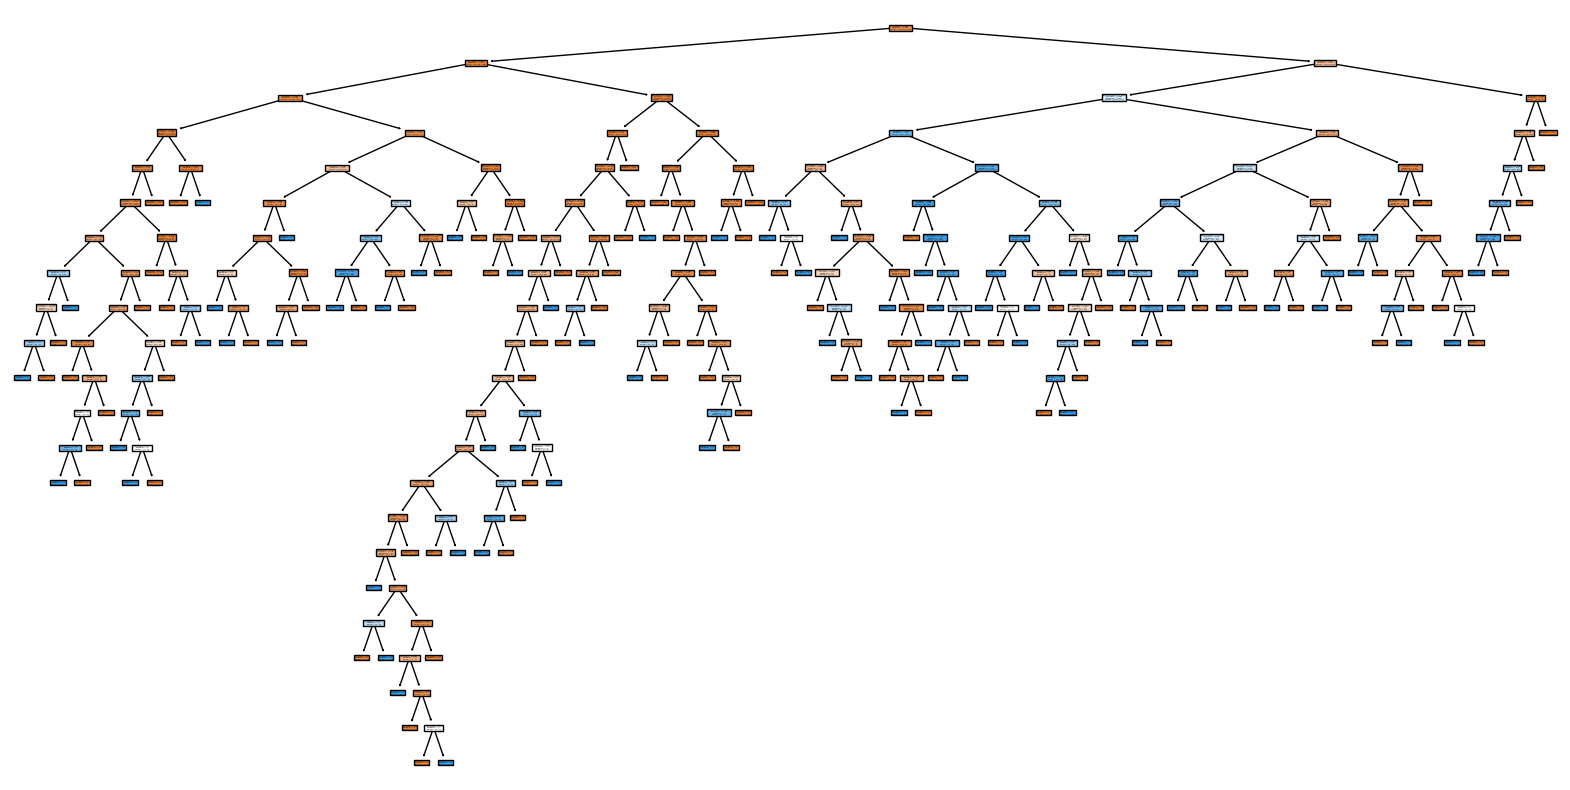

In [25]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

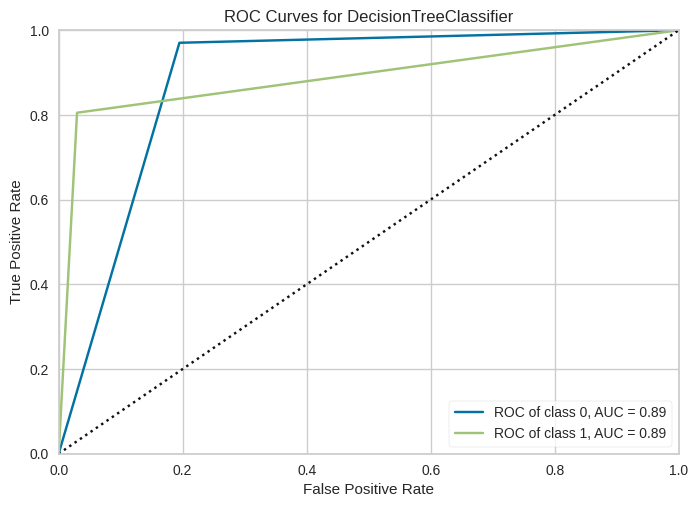

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [26]:
from yellowbrick.classifier import ROCAUC
vis_tree = ROCAUC(tree_model, micro = False, macro = False)
vis_tree.fit(X_train, y_train)
vis_tree.score(X_test, y_test)
vis_tree.show()